# Brownian Motion

Brownian motion (or Wiener Process) is a ubiquitous concept in mathematical finance and represents the main building block of many quantitative finance models. It represents the limiting case of a _random walk_.
The purpose of this notebook is to present some significant properties of the Brownian Motion and to provide numerical examples of them.

In [1]:
import numpy as np
from numpy.random import normal as norm
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

### Symmetric Random Walk

First, let us build a Random Walk process. The one-dimensional symmetric random walk $M_t$ is defined as follows:
$$ M_t = \sum^T_{t=1} X_t$$
where $X_t$ is a random variable that takes value 1 with probability $p=0.5$ and value -1 with probability $1-p=0.5$ (a fair coin toss).

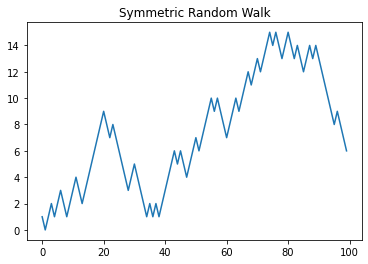

In [2]:
# construction of a symmetric random walk
T = 100 # number of periods
x = np.random.randint(0, 2, size=T) # coin toss proxy
x[x == 0] = -1
rw = np.cumsum(x)
sns.lineplot(data=rw).set_title('Symmetric Random Walk')
plt.show()

The increments are independent and have expected value zero and variance 1. The symmetric random walk accumulates variance at rate 1 per unit of time. This result will be of interest in the following developments. Hence the variance over any time interval $k$ to $l$ with $k<l$ is given by $l-k$. Since the $X_j$ are independent, we have that the variance is the sum of the variance of the single terms
$$
Var(M_l - M_k) = \sum^l_{j=k} Var(X_j) = \sum^l_{j=k} 1 = l - k
$$

### Scaled Symmetric Random Walk

In order to further close the gap to the Brownian Motion, we scale down the steps of the symmetric random walk defined above. We fix a positive integer $n$ and define the _Scaled Symmetric Random Walk_:
$$
W^{(n)}(t) = \frac{1}{\sqrt{n}}M_{nt}
$$
Suppose we choose $T=4$ and $n=100$, the scaled symmetric random walk will be as follows:
$$
W^{(100)}(t) = \frac{1}{10}M_{nt}
$$
Accordingly, $T=4$ will be reached after $nT = 400$ coin tosses. Between $t_0=0$ and $t_1 = 1$ there will be 100 steps. 
As $n$ approaches $\infty$, the scaled symmetric random walk converges to the brownian motion. 

Let us now build a working example.

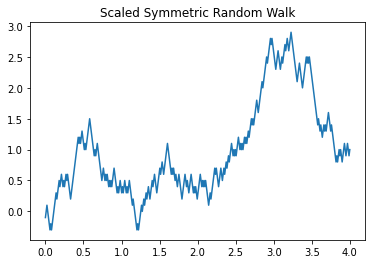

In [3]:
# construction of a scaled symmetric random walk
T = 4 # number of periods
n = 100 # number of steps
x = np.random.randint(0, 2, size=n*T) # coin toss proxy
x[x == 0] = -1
x = x/np.sqrt(n) # scaling of the step by 1/sqrt(n) 
ax = np.linspace(0, T, n*T) # x axis 
rw = np.cumsum(x)
sns.lineplot(y=rw, x=ax).set_title('Scaled Symmetric Random Walk')
plt.show()

Like the random walk, the scaled random walk has independent increments. Non-overlapping increments depend on different coin tosses and are thus independent. Futhermore for $ 0 \leq s \leq t$ we have that 
$$
Var(W^{(n)}(t) - W^{(n)}(s)) = s - t
$$
This is a consequence of the fact that $ W^{(n)}(t) - W^{(n)}(s)$ is the sum of $n(t-s)$ independent random variables with expected value 0 and variance $1/n$. 

Let us finally consider the quadratic variation up to time $t$ of the scaled symmetric random walk. This is defined as the sum of the increments of the process squared. Formally
$$
[W^{(n)}W^{(n)}](t) = \sum^{nt}_{j=1}\left[W^{(n)}\left( \frac{j}{n}\right) - W^{(n)}\left( \frac{j-1}{n}\right)\right]^2
$$
So if we would like to compute the quadratic variation up to time $t=2.71$ we can write
$$\begin{align*}
[W^{(100)}W^{(100)}](2.71) &= \sum^{271}_{j=1}\left[W^{(100)}\left( \frac{j}{100}\right) - W^{(100)}\left( \frac{j-1}{100}\right)\right]^2 \\ 
& = \sum^{271}_{j=1}\left[\frac{1}{\sqrt{100}} X_j\right]^2 = \sum^{271}_{j=1}\frac{1}{100} = \frac{271}{100} = 2.71 
\end{align*}
$$
We derive the last equality recalling that $X_j^2 = 1$. Let us check the last statement manually using the scaled symmetric random walk we built in the previous example.

In [4]:
# computation of the quadratic variation of a scaled symmetric random walk
t = 2.71 # quadratic variation to be computed up to t
idx = int(n*t) # upper limit of the sum
x_qv = x[:idx] # we are interested only in the increments between 0 and n*t
qv = np.sum(x_qv**2) # recall we have scaled x in the previous example
print('The quadratic variation of the scaled symmetric random walk up to time {} is: {}'.format(t, round(qv,2)))

The quadratic variation of the scaled symmetric random walk up to time 2.71 is: 2.71


Note how the quadratic variation $[W^{(n)}W^{(n)}](t)$ of a scaled symmetric random walk does not depend on the path. In fact, for different simulations up to the same time $t$, the quadratic variation is always $t$. This will not be the case in Brownian Motion quadratic variation.

#### Limiting distribution of the Scaled Random Walk

Let us now consider the terminal values of a scaled random walk. That is, we fix a terminal time $t$ and we consider the set of possible values that the process can attain at that time. If we stick with the process we have worked on earlier $W^{(100)}(t)$, we will consider the discrete set of values that $W^{(100)}(t)$ can take at the terminal time. Naturally, since we work in a symmetric random walk setting, we know that the probability of an up-movement is the same of a down-movement $p=1-p=0.5$.

Generally, we know that the value of an unscaled random walk $M_t$ can range from $-t$ to $t$. It will reach $t$ if it only moves upward, and $-t$ if it moves only downward. In probabilities, we know that the chances of reaching $t$ are the same as the probabilities of reaching $-t$, formally $\mathsf{Pr}(M_t = t) = \mathsf{Pr}(M_t = -t)$ because of the symmetry of the random walk.

Let us consider 30 coin tosses. In the scaled random walk $W^{(100)}(t)$ setting, this would correspond to $t=0.3$. This can be expressed in terms of the generic unscaled random walk by recalling that $W^{(100)}(0.3) = \frac{1}{10}M_{30}$. We know $M_{30}$ can attain any even integer value between -30 and 30. Probabilities are not influenced by scaling, so it is equivalent to consider the original scaled random walk or the unscaled random walk associated with it. Let us compute an example.

In [5]:
t = 30 # number of coin tosses
hs = np.linspace(0, t, t+1) # possible number of heads
ocms = hs - (t-hs) # set of possible outcomes

# outcomes scaled
ocms_scaled = ocms * (1/10)

np.vstack([hs, ocms, ocms_scaled]) # rows: number of H, final value of M_t, scaled value of M_t

array([[  0. ,   1. ,   2. ,   3. ,   4. ,   5. ,   6. ,   7. ,   8. ,
          9. ,  10. ,  11. ,  12. ,  13. ,  14. ,  15. ,  16. ,  17. ,
         18. ,  19. ,  20. ,  21. ,  22. ,  23. ,  24. ,  25. ,  26. ,
         27. ,  28. ,  29. ,  30. ],
       [-30. , -28. , -26. , -24. , -22. , -20. , -18. , -16. , -14. ,
        -12. , -10. ,  -8. ,  -6. ,  -4. ,  -2. ,   0. ,   2. ,   4. ,
          6. ,   8. ,  10. ,  12. ,  14. ,  16. ,  18. ,  20. ,  22. ,
         24. ,  26. ,  28. ,  30. ],
       [ -3. ,  -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,
         -1.2,  -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,
          0.6,   0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,
          2.4,   2.6,   2.8,   3. ]])

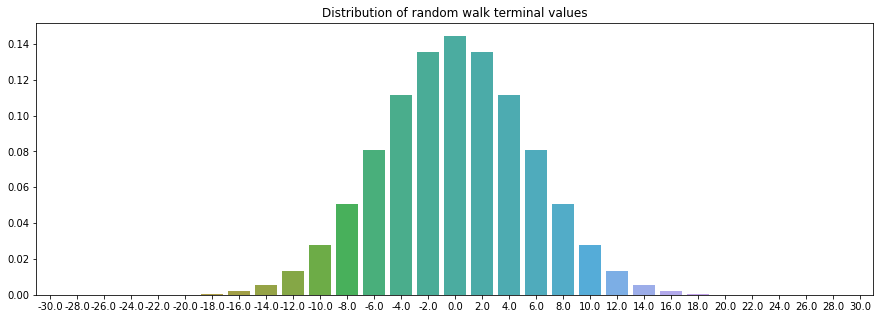

In [6]:
p = 0.5 # probability of heads and tails
pmf = binom.pmf(hs, t, p)
hist = np.vstack([pmf, ocms])

plt.figure(figsize=(15,5))
sns.barplot(x=ocms, y=pmf).set_title('Distribution of random walk terminal values')
plt.show()

### Brownian Motion

The brownian motion represents the limit of the scaled random walk we previously introduced $W^{(n)}(t)$ as $n\rightarrow \infty$. The brownian motion has the following characterizing properties:
* the brownian motion $W(t)$ is a continuous function of $t\geq0$
* $W(0) = 0$
* the increments $W(t_{i+1}) - W(t_i)$ for $i=0,...,T$ are independent and normally distributed with
\begin{align*}
\mathbf{E}[W(t_{i+1}) - W(t_i)] &= 0 \\
Var(W(t_{i+1}) - W(t_i)) &= t_{i+1} - t_i
\end{align*}

The intuition behind the concept of the brownian motion is that of an infinitely fast random walk, a random process with an infinitely small time step. Indeed, while the random walk is linear between time steps, the Wiener process is never linear (and thus it is never differentiable in $t$). The idea is that of an very edgy process with no smooth segments. Finally, although the scaled random walk is approximately normal, regardless of how small the time step is taken to be, the brownian motion is exactly normally distributed.

The brownian motion is continuous. However, in practice, computational methods require a discretization of the process. This is achieved by reducing the time step of the scaled random walk to be extremely small. Although we rely on a somewhat simplistic representation of a brownian motion, the results we draw by means of the scaled random walk can be extended to the true process.

The relation between the variance of the brownian motion and time $t_{i+1} - t{i}$ is intuitive. At $t_0$ the process starts at value 0. If we observe the process at an infinitesimally later time, $t_{0 + \varepsilon}$, the process will not be at 0 anymore. However, it will be extremely close. If instead we let a reasonable amount of time pass by, the process will have accumulated a large variance and will therefore be quite distant from 0. Formally, assuming $t_0 < t_{0+\varepsilon} < t_s$ we will have:

\begin{align*}
Var(W(t_{0+\varepsilon}) - W(t_0)) &= t_{0+\varepsilon} - t_0 = t_{0+\varepsilon}\\
Var(W(t_{s}) - W(t_0)) &= t_{s} - t_0 = t_s
\end{align*}

The latter conditions prove mathematically the previous remark. Informally we could say that the range of values that the brownian motion can attain increases with time.


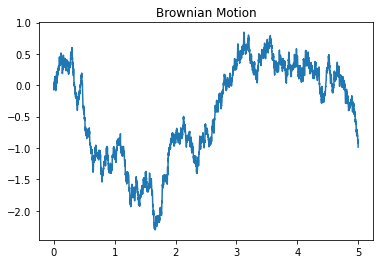

In [7]:
# build a brownian motion process
T = 5 # terminal time
n = 1000 # number of steps between each time stamp

# when the time steps are equally distanced we can compute the standard deviation of the process as the square root of the time step itself
sigma = 1/np.sqrt(n)

# the increments can be generated in two ways:
# generate standard normal variates and multiply them by the standard deviation
# increments = sigma * norm(size=T*n)
# generate normal variates with the desired standard deviation
increments = norm(scale=sigma, size=T*n)

# the brownian motion at t=0 must be 0 by definition
bt = np.cumsum(increments)
bt = np.insert(bt, 0,0)

ax = np.linspace(0, T, (n*T)+1) # x axis
sns.lineplot(y=bt, x=ax).set_title('Brownian Motion')
plt.show()

Another fundamental feature of the brownian motion is the Martingale property. A process is a martingale if the expected value of the process at time $t>s$ conditional on the information at time $s$ is the value of the process at time $s$. Formally:
\begin{equation*}
\mathbf{E}[W(t)|\mathcal{F}(s)] = W(s)
\end{equation*}
This property can be proved as follows
\begin{align*}
\mathbf{E}[W(t)|\mathcal{F}(s)] &= \mathbf{E}[W(t) - W(s) + W(s) |\mathcal{F}(s)] \\
&= \mathbf{E}[W(t) - W(s) |\mathcal{F}(s)] + \mathbf{E}[W(s) |\mathcal{F}(s)] \\
& = \mathbf{E}[W(t) - W(s) |\mathcal{F}(s)] + W(s) \\
& = W(s)
\end{align*}

The second equation comes from the fact that $W(t)$ and $W(s)$ are independent. The next-to-last follows from the fact that brownian motion increments have 0 expected value. Naturally, since $W(0)=0$ we have that
\begin{equation*}
\mathbf{E}[W(t)|\mathcal{F}(0)] = W(0) = 0
\end{equation*}

Now let us illustrate the martingale property with few examples.

In [8]:
# build a brownian motion process
T = 5 # terminal time
n = 100 # number of steps between each time stamp
n_paths = 100 # number of paths to average

sigma = 1/np.sqrt(n) # variance of the increments

# we compute the terminal values of the process for n_path times
increments = norm(scale=sigma, size=(T*n, n_paths))
increments = increments - np.mean(increments, axis=0) # demeaning increments for fast-converging results
bt = np.cumsum(increments, axis=0)
# take the terminal values of the processes
bT = bt[-1,:]

# expected value precise to the third decimal place
print('The expected value at time t_0 of the process is: E[W(T)|W(t_0)] = {}'.format(str(round(np.mean(bT), 3))))

The expected value at time t_0 of the process is: E[W(T)|W(t_0)] = 0.0


We now propose an example where we compute the expected value at time $t_s \neq t_0$, conditional on the information available at $t_s< T$ and show that, since the process is a martingale $\mathbf{E}[W(T)|W(t_s)] = W(t_s)$.

In [9]:
# build a brownian motion process
T = 5 # terminal time
t_s = 3 # intermediate step
n = 100 # number of steps between each time stamp
n_paths = 100 # number of paths to average

sigma = 1/np.sqrt(n) # variance of the increments

# compute one process up to time t_s
bs = np.cumsum(norm(scale=sigma, size=(t_s*n)))[-1]
print('The value of the process at time t_s is: W(t_s) = {}'.format(round(bs, 3)))

# compute n_paths processes from time t_s up to final time T
sp = np.full(n_paths, bs)
increments = norm(scale=sigma, size=((T - t_s)*n, n_paths)) # T - t_s is the number of remaining time periods
increments = increments - np.mean(increments, axis=0) # demeaning increments for fast-converging results
bt = np.cumsum(increments, axis=0)

# take the terminal values of the processes
bT = bs + bt[-1,:]
# expected value precise to the third decimal place
print('The expected value of the process at time T conditional on the value at time t_s is: E[W(T)|W(t_s)] = {}'.format(str(round(np.mean(bT), 3))))

The value of the process at time t_s is: W(t_s) = -1.453
The expected value of the process at time T conditional on the value at time t_s is: E[W(T)|W(t_s)] = -1.453


### Quadratic Variation

Quadratic variation is pivotal to further steps in stochastic calculus. The notion of quadratic variation underlies the development of volatility of stochastic processes and it is a feature that tells apart ordinary calculus from the stochastic counterpart. Indeed, ordinary functions have continuous derivatives and therefore have zero quadratic variation. Let the quadratic variation of a $\mathcal{C}^1$ function $f$ up to time $T$ be defined as follows:
\begin{equation*}
[f,f](T) = \lim_{\lVert \Pi \rVert \rightarrow 0} \sum^{n-1}_{j=0}(f_{t_{j+1}} - f_{t_j})^2
\end{equation*}
Where $\lVert \Pi \rVert$ is the maximum step between $t_{j}$ and $t_{j+1}$. As $\lVert \Pi \rVert$ shrinks, the quadratic variation $[f,f](T)$ converges to zero for ordinary functions. Let us illustrate with an example.

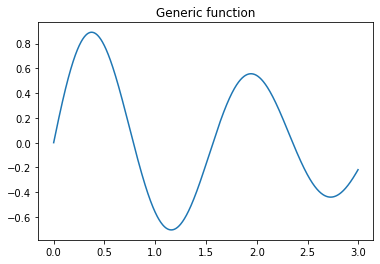

In [10]:
# let us define an ordinary function f and compute its quadratic variation
def f(x): # function to compute quadratic variation
    return np.sin(4*x)*np.exp(-0.3*x)

n_steps = 1000
x= np.linspace(0,3,n_steps) # function's support
sns.lineplot(y=f(x), x=np.arange(0,3,3/n_steps)).set_title('Generic function')
plt.show()

In [11]:
# let us now compute the quadratic variation of the generic function defined above
diff = (np.diff(f(x))) # first difference of the function points
qv = np.sum(diff**2)
print('The approximated quadratic variaton of the function with subintervals of length {} is: {}'.format(1/n_steps, round(qv,4)))
n_steps = 100000
x= np.linspace(0,3,n_steps) # function's support
diff = (np.diff(f(x))) # first difference of the function points
qv = np.sum(diff**2)
print('The approximated quadratic variaton of the function with subintervals of length {} is: {}'.format(1/n_steps, round(qv,4)))

The approximated quadratic variaton of the function with subintervals of length 0.001 is: 0.033
The approximated quadratic variaton of the function with subintervals of length 1e-05 is: 0.0003


Now let's turn to the Quadratic Variation of a brownian motion. This process differs fundamentally from the previous function for it is never differentiable with respect to the time variable. The brownian motion can in fact be thought of as an extremely "pointy" process, much like the symmetric random walk we saw before. The brownian motion however has an infinitely small time step and therefore in practice every segment between two consequent time steps is itself infinitely "pointy".

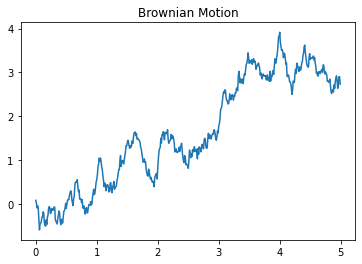

In [17]:
# quadratic variation of a brownian motion
T = 5 # terminal time
n = 100
sigma = np.sqrt(1/n)

increments = norm(scale=sigma, size=T*n)
bt = np.cumsum(increments)
sns.lineplot(y= bt, x=np.arange(0,T,1/n)).set_title('Brownian Motion')
plt.show()

In [18]:
# quadratic variation of the brownian motion
var_bt = (np.diff(bt))**2
qv = np.sum(var_bt)
print('The approximated quadratic variaton of the Brownian Motion path with subintervals of length {} is: {}'.format(1/n, round(qv,4)))

The approximated quadratic variaton of the Brownian Motion path with subintervals of length 0.01 is: 5.2035
